# Machine Learning: Assignment #2

Bárbara Nóbrega Galiza – 202408654​

Cláudia Oliveira - 202005668​

Marta Campos - 202008344

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Preprocessing

Datasets

In [4]:
# Diagnoses and their descriptions
diag = pd.read_csv('tables/DIAGNOSES_ICD.csv')
desc = pd.read_csv('tables/D_ICD_DIAGNOSES.csv')

# Patient demographic information
patients = pd.read_csv('tables/PATIENTS.csv')

# Hospital admissions 
admissions = pd.read_csv('tables/ADMISSIONS.csv')

# ICU stays per patient admission
icustays = pd.read_csv('tables/ICUSTAYS.csv')

# Charted events: vital signs, lab results, nurse observations, etc.
chartevents = pd.read_csv('tables/chart_4280.csv', low_memory=False)
#chartevents = pd.read_csv('tables/CHARTEVENTS.csv', low_memory=False)

# Dictionary that maps ITEMIDs to their names/descriptions
items = pd.read_csv('tables/D_ITEMS.csv')

Choosing the Disease

In [5]:
d = diag[diag['ICD9_CODE'] == '4280']

d1= d[d['SEQ_NUM'] == 1.0].copy()

print(d1.size)

diag_seq2 = diag[diag['SEQ_NUM'] == 2.0][['HADM_ID', 'ICD9_CODE']].rename(columns={'ICD9_CODE': 'comorbidity1'})
d1 = d1.merge(diag_seq2, on='HADM_ID', how='left')
d1['comorbidity1'] = d1['comorbidity1'].fillna(0)

diag_seq2 = diag[diag['SEQ_NUM'] == 3.0][['HADM_ID', 'ICD9_CODE']].rename(columns={'ICD9_CODE': 'comorbidity2'})
d1 = d1.merge(diag_seq2, on='HADM_ID', how='left')
d1['comorbidity2'] = d1['comorbidity2'].fillna(0)

d1.head(15)

#hadm_ids = d1['HADM_ID'].unique()
#chart_4280 = chartevents[chartevents['HADM_ID'].isin(hadm_ids)].copy()
#chart_4280.to_csv('chart_4280.csv', index=False)

2850


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,comorbidity1,comorbidity2
0,2163,176,135828,1.0,4280,42731,4251
1,2172,177,143120,1.0,4280,51881,5119
2,2460,199,185360,1.0,4280,4254,4240
3,2516,205,135671,1.0,4280,4240,5990
4,4092,351,174800,1.0,4280,78057,6110
5,3775,323,106158,1.0,4280,99672,99762
6,3784,323,128132,1.0,4280,78551,51881
7,5001,414,153627,1.0,4280,5119,42731
8,5839,495,186199,1.0,4280,5845,7895
9,7557,654,136326,1.0,4280,486,51881


Percentage of the frequency explained by the top 5 comorbities: 31.05263157894737 %


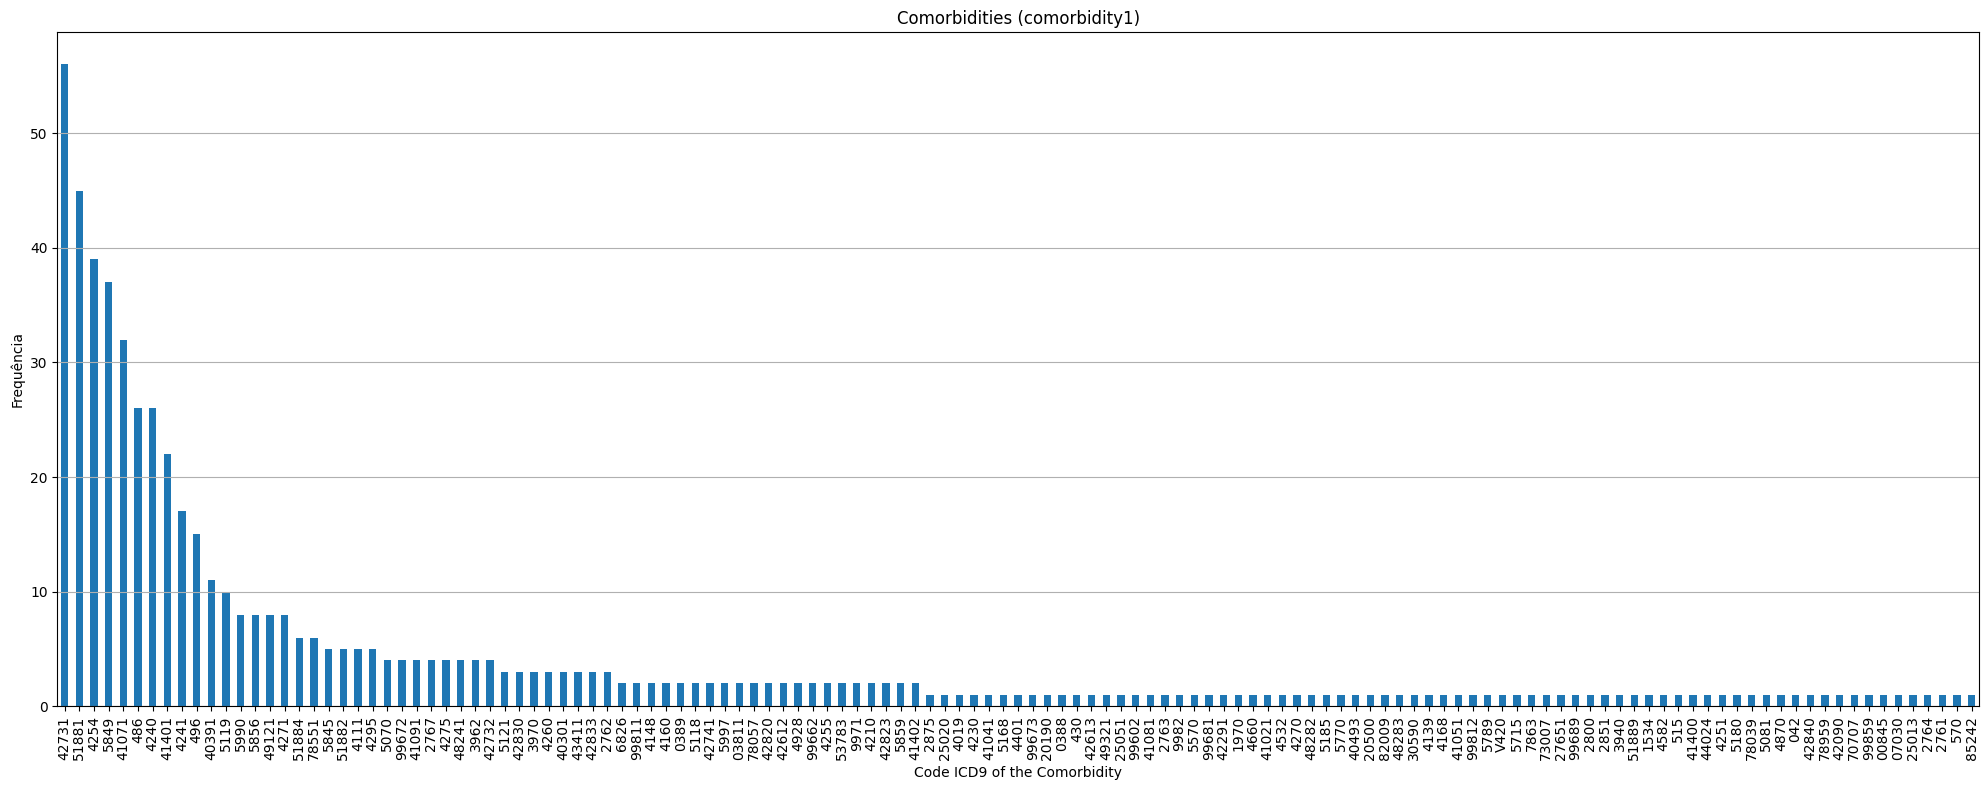

In [6]:
counts = d1['comorbidity1'].value_counts()

c1 = sum(counts[0:4])/sum(counts[:]) 
print("Percentage of the frequency explained by the top 5 comorbities: " + str(c1*100) + " %")

plt.figure(figsize=(20,8))
counts.plot(kind='bar')
plt.title('Comorbidities (comorbidity1)')
plt.xlabel('Code ICD9 of the Comorbidity')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Percentage of the frequency explained by the top 5 comorbities2: 24.035087719298247 %


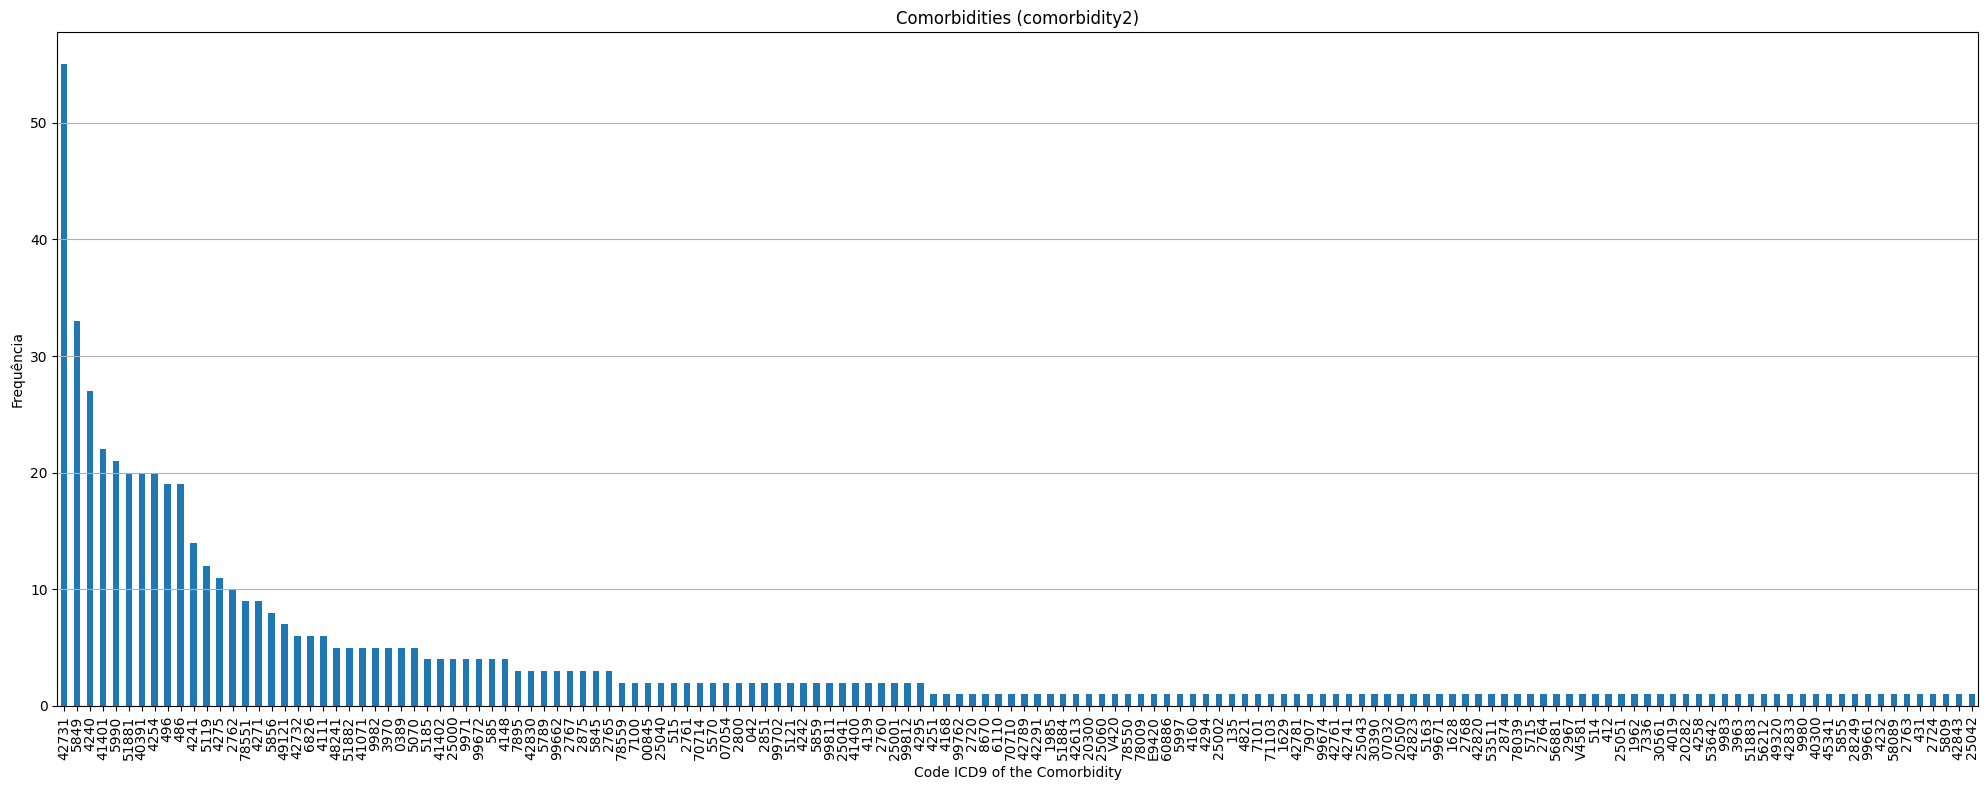

In [7]:
counts = d1['comorbidity2'].value_counts()

c1 = sum(counts[0:4])/sum(counts[:]) 
print("Percentage of the frequency explained by the top 5 comorbities2: " + str(c1*100) + " %")

plt.figure(figsize=(20,8))
counts.plot(kind='bar')
plt.title('Comorbidities (comorbidity2)')
plt.xlabel('Code ICD9 of the Comorbidity')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [8]:
print(f"Columns of Diagnosis: {diag.columns} \n")
print(f"Columns of Description of Diseases: {desc.columns} \n")
print(f"Columns of ICU Stays: {icustays.columns} \n")
print(f"Columns of Chart Events: {chartevents.columns} \n")
print(f"Columns of Patients: {patients.columns} \n")
print(f"Columns of Admissions: {admissions.columns} \n")

top_codes = diag['ICD9_CODE'].value_counts().head(15).reset_index()
top_codes.columns = ['ICD9_CODE', 'count']

top_diseases = top_codes.merge(desc[['ICD9_CODE', 'SHORT_TITLE']], on='ICD9_CODE', how='left')

print(top_diseases)

Columns of Diagnosis: Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE'], dtype='object') 

Columns of Description of Diseases: Index(['ROW_ID', 'ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE'], dtype='object') 

Columns of ICU Stays: Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'DBSOURCE',
       'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID',
       'INTIME', 'OUTTIME', 'LOS'],
      dtype='object') 

Columns of Chart Events: Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID', 'CHARTTIME',
       'STORETIME', 'CGID', 'VALUE', 'VALUENUM', 'VALUEUOM', 'WARNING',
       'ERROR', 'RESULTSTATUS', 'STOPPED'],
      dtype='object') 

Columns of Patients: Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG'],
      dtype='object') 

Columns of Admissions: Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHAR

In [9]:
icu_diag = icustays.merge(diag, on="HADM_ID", how="inner")
diag_counts = icu_diag.groupby("ICUSTAY_ID")["ICD9_CODE"].nunique().reset_index()
diag_counts = diag_counts.rename(columns={"ICD9_CODE": "num_diagnoses"})
has_multiple = diag_counts["num_diagnoses"] > 1
print(f"ICU stays with multiple diagnoses: {has_multiple.sum()} out of {len(diag_counts)}")
diag_counts

ICU stays with multiple diagnoses: 61215 out of 61532


,ICUSTAY_ID,num_diagnoses
0,200001,20
1,200003,6
2,200006,8
3,200007,7
4,200009,6
...,...,...
61527,299993,2
61528,299994,19
61529,299995,5
61530,299998,13


Our chosen dicease is Congestive heart failure, unspecified

ICD9_CODE 4280

### Data Preparation

In [10]:
# Merge com a tabela de ADMISSIONS para adicionar informações da internação (ADMITTIME, ADMISSION_TYPE, etc.)
dataset = d1.merge(admissions[['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'INSURANCE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY']], on=['SUBJECT_ID', 'HADM_ID'], how='left')

# Merge com a tabela de PATIENTS para adicionar as informações demográficas (GENDER, DOB)
dataset = dataset.merge(patients[['SUBJECT_ID', 'GENDER', 'DOB']], on='SUBJECT_ID', how='left')

# Merge com a tabela de CHARTEVENTS para adicionar os dados dos sinais vitais, exames laboratoriais, etc.
dataset = dataset.merge(chartevents[['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID', 'CHARTTIME', 'VALUE', 'VALUENUM', 'VALUEUOM']], on=['SUBJECT_ID', 'HADM_ID'], how='left')

# Merge com a tabela de ICUSTAYS para adicionar os dados de LOS (Length of Stay) por ICUSTAY_ID
dataset = dataset.merge(icustays[['ICUSTAY_ID', 'LOS']], on='ICUSTAY_ID', how='left')

# Exibindo as primeiras linhas para verificar se o merge foi bem sucedido
print(dataset.head(5))

   ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE comorbidity1 comorbidity2  \
0    2163         176   135828      1.0      4280        42731         4251   
1    2163         176   135828      1.0      4280        42731         4251   
2    2163         176   135828      1.0      4280        42731         4251   
3    2163         176   135828      1.0      4280        42731         4251   
4    2163         176   135828      1.0      4280        42731         4251   

             ADMITTIME ADMISSION_TYPE         ADMISSION_LOCATION  ...  \
0  2142-07-16 16:50:00      EMERGENCY  CLINIC REFERRAL/PREMATURE  ...   
1  2142-07-16 16:50:00      EMERGENCY  CLINIC REFERRAL/PREMATURE  ...   
2  2142-07-16 16:50:00      EMERGENCY  CLINIC REFERRAL/PREMATURE  ...   
3  2142-07-16 16:50:00      EMERGENCY  CLINIC REFERRAL/PREMATURE  ...   
4  2142-07-16 16:50:00      EMERGENCY  CLINIC REFERRAL/PREMATURE  ...   

  ETHNICITY GENDER                  DOB ICUSTAY_ID ITEMID  \
0     WHITE      M  2063-

In [39]:
# 1. Converte 'ADMITTIME' e 'DOB' para datetime (com erros forçados como NaT)
dataset['ADMITTIME'] = pd.to_datetime(dataset['ADMITTIME'], errors='coerce')
dataset['DOB'] = pd.to_datetime(dataset['DOB'], errors='coerce')

# 2. Cria uma coluna de idade, inicializada como NaN
dataset['AGE'] = None

# 3. Define uma função segura para calcular idade
def safe_calculate_age(row):
    try:
        # Se qualquer um for NaT, retorna NaN
        if pd.isna(row['ADMITTIME']) or pd.isna(row['DOB']):
            return None
        # Se o ano de nascimento for absurdo (tipo maior que 2200)
        if row['DOB'].year > 2200:
            return 89
        # Calcula idade normal
        age = (row['ADMITTIME'] - row['DOB']).days / 365.242
        return 89 if age > 89 else age
    except Exception as e:
        # Qualquer erro, retorna NaN
        return None

# 4. Aplica de forma segura
dataset['AGE'] = dataset.apply(safe_calculate_age, axis=1)

dataset['AGE'] = dataset['AGE'].fillna(200).astype(int)
dataset = dataset[dataset['AGE'] != 200]

# 5. (opcional) dropa as colunas DOB e ADMITTIME
dataset.drop(columns=['DOB', 'ADMITTIME'], inplace=True)

# Verifica
print(dataset[['SUBJECT_ID', 'AGE']].head())

   SUBJECT_ID  AGE
0         176   78
1         176   78
2         176   78
3         176   78
4         176   78


### Training and Validation

### Analysis of Results and Interpretation